In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import logging

# Configuração de logging
logging.basicConfig(
    filename='log_usuario.txt',
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s'
)
logging.info("Programa iniciado.")

In [2]:
while True:
    nome = input("Digite seu nome: ")

    if nome.replace(" ", "").isalpha() and len(nome) >= 3:
        logging.info(f'Usuário validado: {nome}')
        print('Usuário validado!')
        break

    print("Nome inválido. Deve conter apenas letras e ter pelo menos 3 caracteres.")
    logging.warning("Tentativa de nome inválido.")

Usuário validado!


In [4]:
path = input("Qual o caminho do seu arquivo? ")
# C:/Users/vinic/Documents/Faculdade/4º Semestre/Nova pasta/Trabalho/Students_Grading_Dataset.csv
logging.info(f'Caminho do arquivo informado: {path}')

df = None  # Inicializa df fora do bloco de leitura

if not os.path.exists(path):
    print("Erro: O arquivo não foi encontrado.")
    logging.error("Arquivo não encontrado.")
else:
    try:
        ext = os.path.splitext(path)[1].lower()

        if ext == ".csv":
            df = pd.read_csv(path, encoding="utf-8")
            logging.info("Arquivo CSV carregado com sucesso.")
        elif ext == ".json":
            df = pd.read_json(path, encoding="utf-8")
            logging.info("Arquivo JSON carregado com sucesso.")
        else:
            print("Erro: Formato de arquivo não suportado.")
            logging.error(f"Formato não suportado: {ext}")

        if df is not None:
            print('Resumo estatístico dos dados carregados.\n')
            print(df.describe())
            logging.info("Resumo estatístico do DataFrame exibido.")
    except Exception as e:
        print("Erro ao carregar o arquivo:", e)
        logging.error(f"Erro ao carregar o arquivo: {e}")

Resumo estatístico dos dados carregados.

               Age  Attendance (%)  Midterm_Score  Final_Score  \
count  5000.000000     5000.000000    5000.000000  5000.000000   
mean     21.048400       75.356076      70.701924    69.546552   
std       1.989786       14.392716      17.436325    17.108996   
min      18.000000       50.010000      40.000000    40.010000   
25%      19.000000       62.945000      55.707500    54.697500   
50%      21.000000       75.670000      70.860000    69.485000   
75%      23.000000       87.862500      85.760000    83.922500   
max      24.000000      100.000000      99.990000    99.980000   

       Assignments_Avg  Quizzes_Avg  Participation_Score  Projects_Score  \
count      5000.000000  5000.000000          5000.000000      5000.00000   
mean         74.956320    74.836214             4.996372        74.78305   
std          14.404287    14.423848             2.898978        14.54243   
min          50.000000    50.000000             0.000000   

In [6]:
try:
    print("Quantidade total de registros:", len(df))
    print("Quantidade de homens:", len(df[df['Gender'] == 'Male']))
    print("Quantidade de mulheres:", len(df[df['Gender'] == 'Female']))
    print("Registros sem dados sobre a educação dos pais:", df['Parent_Education_Level'].isna().sum())
    logging.info("Estatísticas iniciais de gênero e educação dos pais exibidas.")
except Exception as e:
    print("Erro ao exibir estatísticas iniciais:", e)
    logging.error(f"Erro nas estatísticas iniciais: {e}")

Quantidade total de registros: 5000
Quantidade de homens: 2551
Quantidade de mulheres: 2449
Registros sem dados sobre a educação dos pais: 1025


In [7]:
try:
    print("Quantidade total de registros:", len(df))
    df = df.dropna(subset=['Parent_Education_Level'])
    logging.info("Registros com educação dos pais nula removidos.")

    df['Attendance (%)'] = df['Attendance (%)'].fillna(df['Attendance (%)'].median())
    logging.info("Valores nulos em 'Attendance (%)' substituídos pela mediana.")

    print("Resultado após a limpeza:", len(df))
    print("Somatório de Attendance (%):", df['Attendance (%)'].sum())
except Exception as e:
    print("Erro ao limpar os dados:", e)
    logging.error(f"Erro na limpeza de dados: {e}")

Quantidade total de registros: 5000
Resultado após a limpeza: 3975
Somatório de Attendance (%): 299245.58999999997


In [8]:
try:
    print("Quantidade total de registros:", len(df))
    colunas_numericas = list(df.select_dtypes(include=['number']).columns)
    print("Colunas disponíveis:", colunas_numericas)

    coluna = input("Escolha uma coluna numérica: ")

    if coluna in colunas_numericas:
        media = df[coluna].mean()
        mediana = df[coluna].median()
        moda = df[coluna].mode()[0]
        desvio = df[coluna].std()

        print(f"Média: {media:.2f}")
        print(f"Mediana: {mediana}")
        print(f"Moda: {moda}")
        print(f"Desvio Padrão: {desvio:.2f}")

        logging.info(f"Análise estatística da coluna: {coluna}")
    else:
        print("Coluna inválida. Escolha uma coluna numérica válida.")
        logging.warning(f"Coluna numérica inválida selecionada: {coluna}")
except Exception as e:
    print("Erro ao calcular estatísticas:", e)
    logging.error(f"Erro na análise estatística: {e}")

Quantidade total de registros: 3975
Colunas disponíveis: ['Age', 'Attendance (%)', 'Midterm_Score', 'Final_Score', 'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score', 'Projects_Score', 'Total_Score', 'Study_Hours_per_Week', 'Stress_Level (1-10)', 'Sleep_Hours_per_Night']
Média: 21.05
Mediana: 21.0
Moda: 21
Desvio Padrão: 1.99


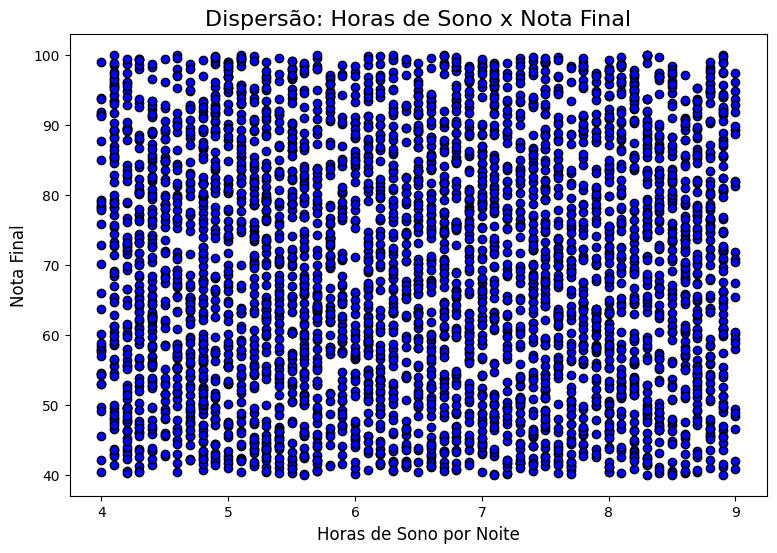

In [10]:
try:
    plt.figure(figsize=(9, 6))  # aumenta o tamanho da figura

    plt.scatter(
        df['Sleep_Hours_per_Night'],
        df['Final_Score'],                
        edgecolors='k',           # contorno preto nos pontos
        color='blue'           # cor azul
    )

    plt.title("Dispersão: Horas de Sono x Nota Final", fontsize=16)
    plt.xlabel("Horas de Sono por Noite", fontsize=12)
    plt.ylabel("Nota Final", fontsize=12)
    plt.show()
    logging.info("Gráfico de dispersão gerado.")
    
except Exception as e:
    print("Erro ao gerar gráfico de dispersão:", e)
    logging.error(f"Erro no gráfico de dispersão: {e}")

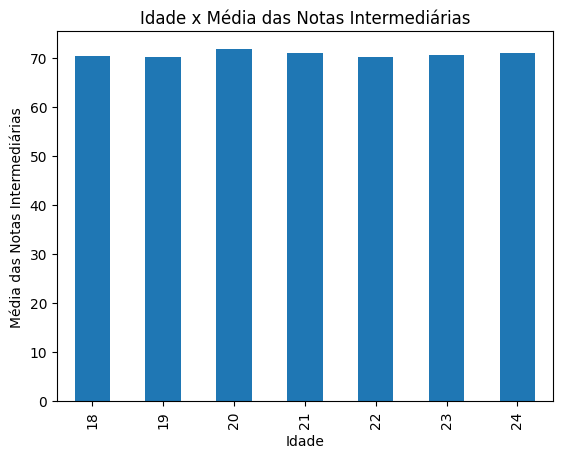

In [11]:
try:
    df.groupby('Age')['Midterm_Score'].mean().plot(kind='bar')
    plt.xlabel("Idade")
    plt.ylabel("Média das Notas Intermediárias")
    plt.title("Idade x Média das Notas Intermediárias")
    plt.show()
    logging.info("Gráfico de barras por idade gerado.")
except Exception as e:
    print("Erro ao gerar gráfico de barras:", e)
    logging.error(f"Erro no gráfico de barras: {e}")

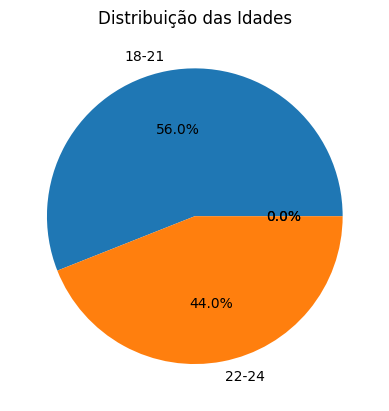

In [12]:
try:
    bins = [0, 17, 21, 24, 100]
    labels = ['Até 17', '18-21', '22-24', '25+']

    df['faixa_etaria'] = pd.cut(df['Age'], bins, labels=labels)
    df['faixa_etaria'].value_counts().plot(kind='pie', autopct='%1.1f%%')

    plt.title("Distribuição das Idades")
    plt.ylabel("")
    plt.show()
    logging.info("Gráfico de pizza com faixas etárias gerado.")
except Exception as e:
    print("Erro ao gerar gráfico de pizza:", e)
    logging.error(f"Erro no gráfico de pizza: {e}")